In [1]:
import sys
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from scipy.special import rel_entr
from scipy.spatial.distance import correlation 
import scipy.stats as stats
import dcor
from sklearn.feature_selection import mutual_info_classif

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
def correlation_func(data_1, data_2, correlation_method='pearson'):

    data = np.column_stack((data_1, data_2))
    data = pd.DataFrame(data)

    if correlation_method in ['pearson', 'kendall', 'spearman']:
        corr_val = data.corr(method=correlation_method).iloc[0, 1]

    elif correlation_method == 'distance':
        corr_val = dcor.distance_correlation_func(data.iloc[:, 0], data.iloc[:, 1])

    elif correlation_method == 'mutual_information':
        # implementation as in Fiedor et al. 2014
        quantile_buckets = pd.qcut(data.values.reshape(-1), q=4, labels=False).reshape(-1, 2)
        corr_val = mutual_info_classif(quantile_buckets[:, [0]], quantile_buckets[:, 1], discrete_features=True)[0]

    elif correlation_method == 'squared_pearson':
        corr_val = (data ** 2).corr(method='pearson').iloc[0, 1]

    else:
        raise NotImplementedError('correlation method not implemented')

    return corr_val

In [3]:
discriminatorScore = pd.read_csv('output_score.txt', header=None)
discriminatorScore.columns = ['discriminatorScore']

In [4]:
df = pd.read_csv('predictions_DO0.1.txt', header=None)
for para in [0.15, 0.25, 0.3, 0.4, 0.5]:
    df = pd.concat([df, pd.read_csv('predictions_DO'+str(para)+'.txt', header=None)], axis=1)
for para in [0.1, 0.15, 0.25, 0.3, 0.4, 0.5]:
    df = pd.concat([df, pd.read_csv('predictions_fold2_DO'+str(para)+'.txt', header=None)], axis=1)
df.columns = (['insample' + str(para) for para in [0.1, 0.15, 0.25, 0.3, 0.4, 0.5]] + ['outsample' + str(para) for para in [0.1, 0.15, 0.25, 0.3, 0.4, 0.5]])

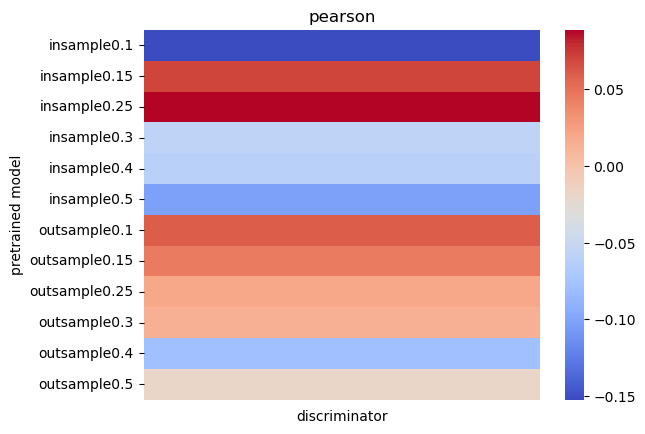

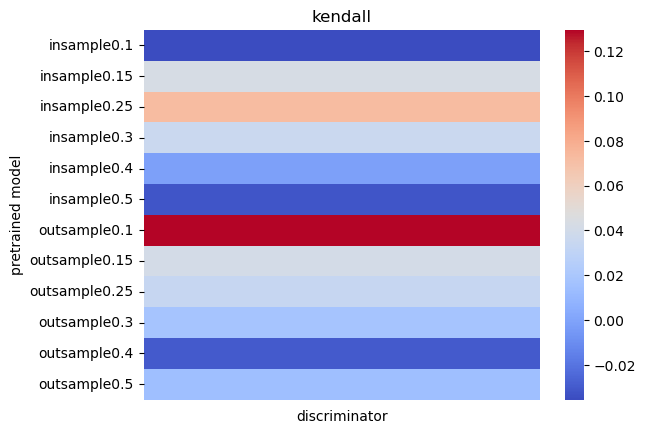

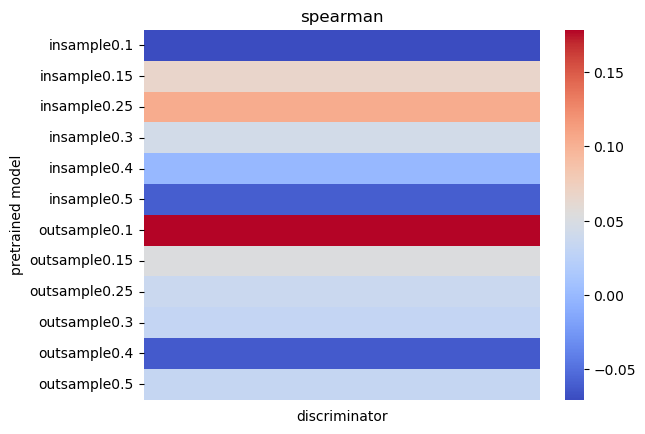

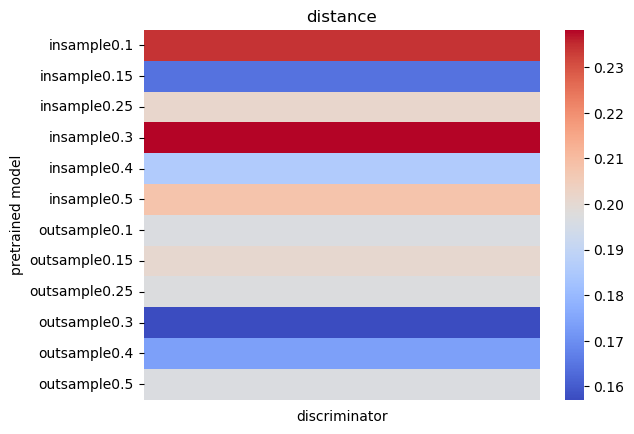

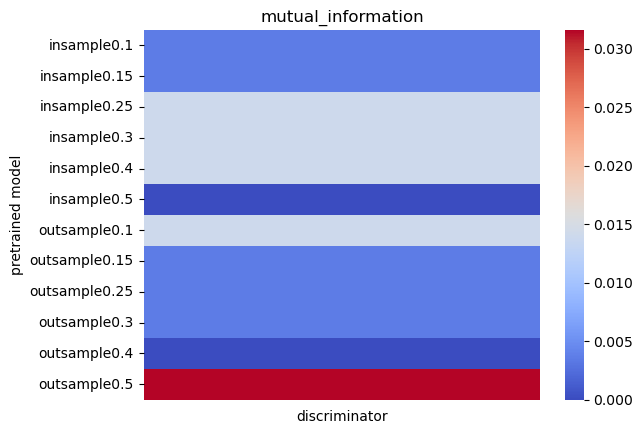

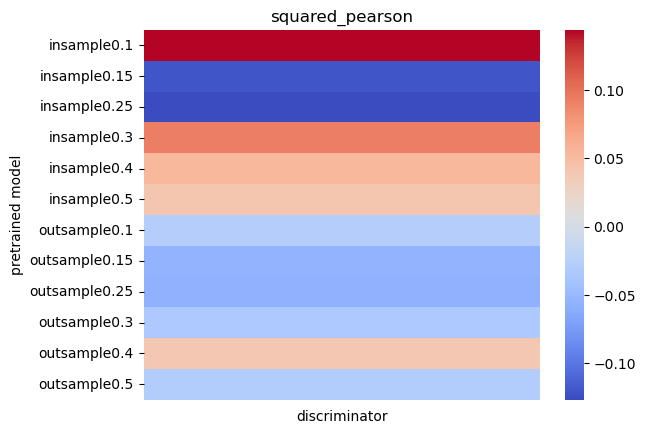

In [16]:
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    distance= np.array([correlation_func(discriminatorScore, df.iloc[:, r], method) for r in range(12)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(distance.reshape(12, 1), cmap = 'coolwarm', ax = ax)
    plt.xticks([])
    plt.yticks(ticks = np.linspace(0.5, 11.5, 12), labels = ['insample' + str(para) for para in [0.1, 0.15, 0.25, 0.3, 0.4, 0.5]] + ['outsample' + str(para) for para in [0.1, 0.15, 0.25, 0.3, 0.4, 0.5]], rotation = 'horizontal')
    plt.xlabel('discriminator')
    plt.ylabel('pretrained model')
    plt.title(method)

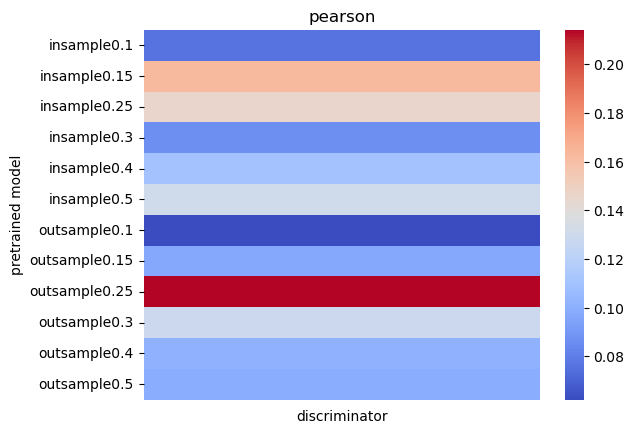

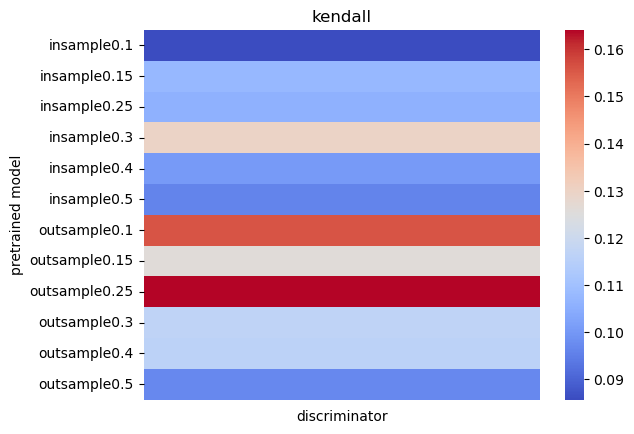

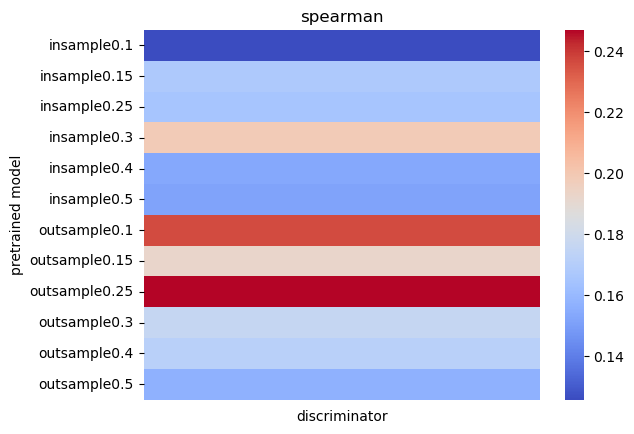

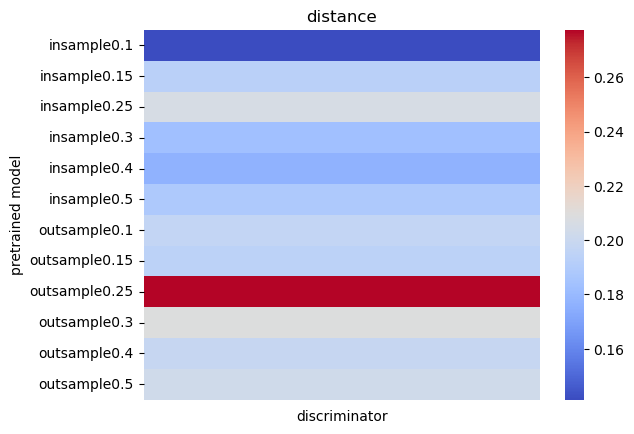

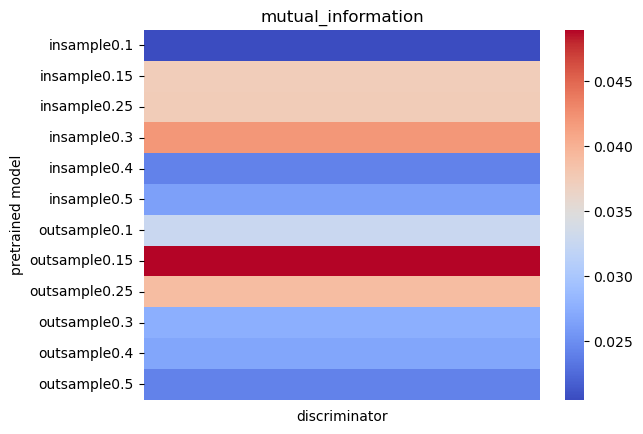

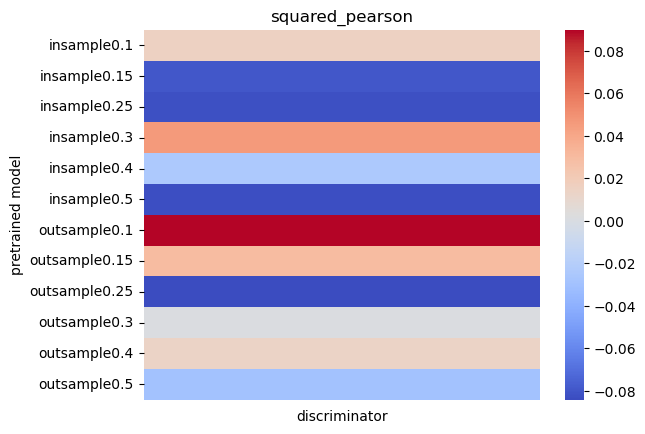

In [17]:
discriminatorScore = pd.read_csv('output_score_.txt', header=None)
discriminatorScore.columns = ['discriminatorScore']
df = pd.read_csv('pred_fold1_DO0.1', header=None)
for para in [0.15, 0.25, 0.3, 0.4, 0.5]:
    df = pd.concat([df, pd.read_csv('pred_fold1_DO'+str(para)+'', header=None)], axis=1)
for para in [0.1, 0.15, 0.25, 0.3, 0.4, 0.5]:
    df = pd.concat([df, pd.read_csv('pred_fold2_DO'+str(para)+'', header=None)], axis=1)
df.columns = (['insample' + str(para) for para in [0.1, 0.15, 0.25, 0.3, 0.4, 0.5]] + ['outsample' + str(para) for para in [0.1, 0.15, 0.25, 0.3, 0.4, 0.5]])
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    distance= np.array([correlation_func(discriminatorScore, df.iloc[:, r], method) for r in range(12)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(distance.reshape(12, 1), cmap = 'coolwarm', ax = ax)
    plt.xticks([])
    plt.yticks(ticks = np.linspace(0.5, 11.5, 12), labels = ['insample' + str(para) for para in [0.1, 0.15, 0.25, 0.3, 0.4, 0.5]] + ['outsample' + str(para) for para in [0.1, 0.15, 0.25, 0.3, 0.4, 0.5]], rotation = 'horizontal')
    plt.xlabel('discriminator')
    plt.ylabel('pretrained model')
    plt.title(method)

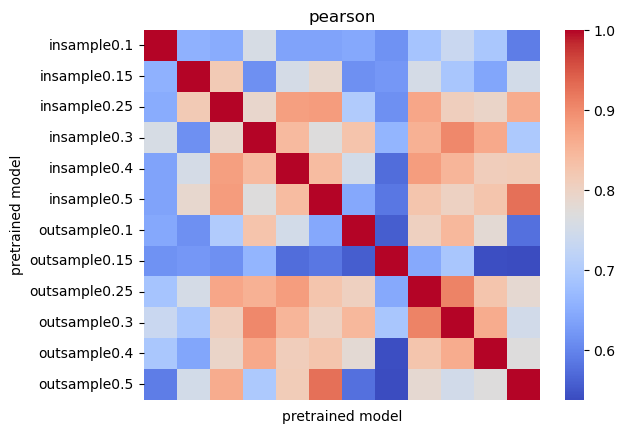

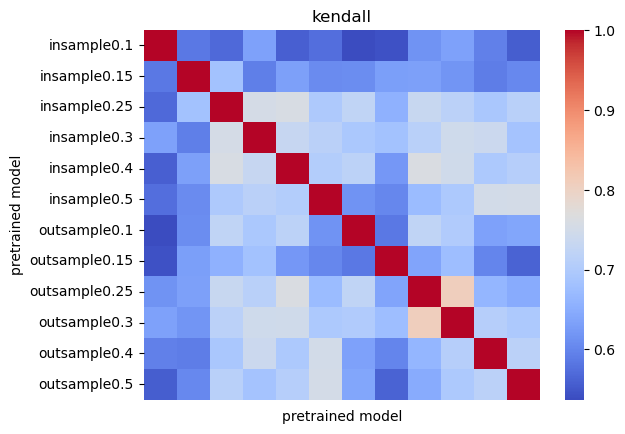

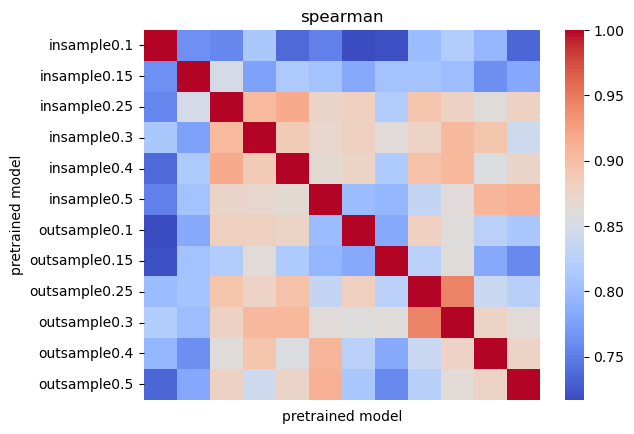

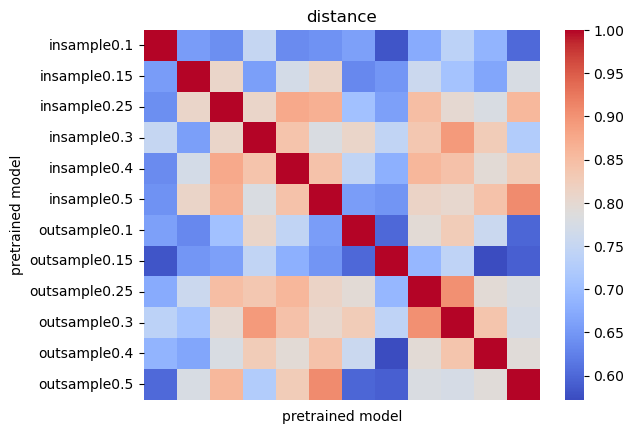

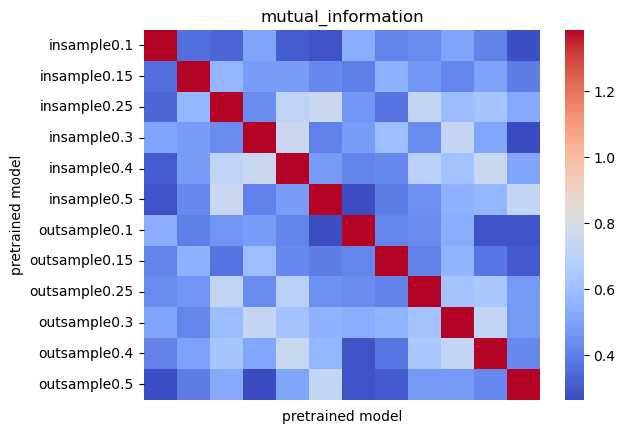

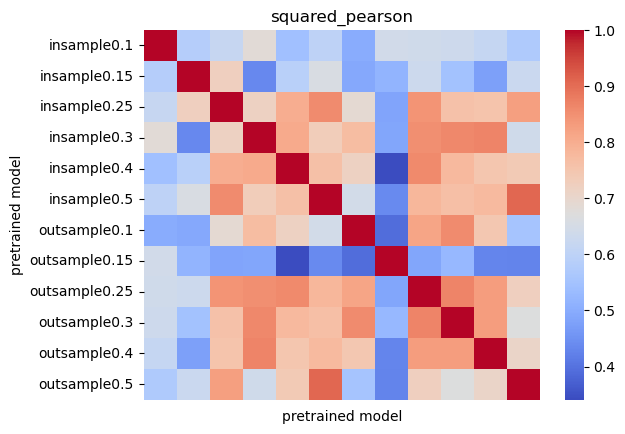

In [7]:
for method in ['pearson', 'kendall', 'spearman', 'distance', 'mutual_information', 'squared_pearson']:
    distance= np.array([[correlation_func(df.iloc[:, s], df.iloc[:, r], method) for r in range(12)] for s in range(12)])
    fig, ax= plt.subplots()
    ax.invert_yaxis()
    sns.heatmap(distance, cmap = 'coolwarm', ax = ax)
    plt.xticks([])
    plt.yticks(ticks = np.linspace(0.5, 11.5, 12), labels = ['insample' + str(para) for para in [0.1, 0.15, 0.25, 0.3, 0.4, 0.5]] + ['outsample' + str(para) for para in [0.1, 0.15, 0.25, 0.3, 0.4, 0.5]], rotation = 'horizontal')
    plt.xlabel('pretrained model')
    plt.ylabel('pretrained model')
    plt.title(method)